In [15]:
# Data Manipulation and Preprocessing
import numpy as np
import pandas as pd
import json
import labtools

# Data Visualization
import matplotlib.pyplot as plt

import warnings
# Suppress the SettingWithCopyWarning
warnings.filterwarnings('ignore')

# Web Interaction and Display
from IPython.display import Image, display, HTML

# Additional JavaScript for toggling code display in Jupyter Notebooks
HTML(
    """
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
"""
)

In [16]:
final_df = pd.read_csv('final_df.csv')

<div style="background-color:#711012; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">SUPPLEMENTARY NOTEBOOK 
        (2001-2005)</h2></center>
</div>

This notebook contains the implementation of the clustering method applied to the abstracts of research publications released between 2001 and 2005.

---

<div style="background-color:#711012; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">TOKEN VECTORIZATION</h2></center>
</div>

This is a snippet of a list of consolidated abstracts of two publications submitted between 2001 and 2005.

In [17]:
# Get the 2001-2005 data
window = list(range(2001, 2006))
df_2001 = final_df[final_df.year.isin(window)]

# Get the abstract of the 1995 dataset
abs_2001 = df_2001.abstract.to_list()
print(abs_2001[:2])

['  The definition and the properties of a Gaussian point distribution, in\ncontrast to the well-known properties of a Gaussian random field are discussed.\nConstraints for the number density and the two-point correlation function\narise. A simple method for the simulation of this so-called Gauss-Poisson point\nprocess is given and illustrated with an example. The comparison of the\ndistribution of galaxies in the PSCz catalogue with the Gauss-Poisson process\nunderlines the importance of higher-order correlation functions for the\ndescription for the galaxy distribution. The construction of the Gauss-Poisson\npoint process is extended to the n-point Poisson cluster process, now\nincorporating correlation functions up to the nth-order. The simulation methods\nand constraints on the correlation functions are discussed for the n-point case\nand detailed for the three-point case. As another approach, well suited for\nstrongly clustered systems, the generalized halo-model is discussed. The

We next create a matrix representing certain words on this list as a column and their corresponding frequencies within each abstract as values in the matrix. This matrix allows for quantitative analysis of the abstracts based on the occurrence of specific keywords or terms. 

To determine the optimal values for `min_df` and `max_df`, we created a heatmap that shows the sparsity of the TF-IDF matrix for different combinations of `min_df` and `max_df` values. The sparsity is calculated as the ratio of zero elements in the matrix to the total number of elements.

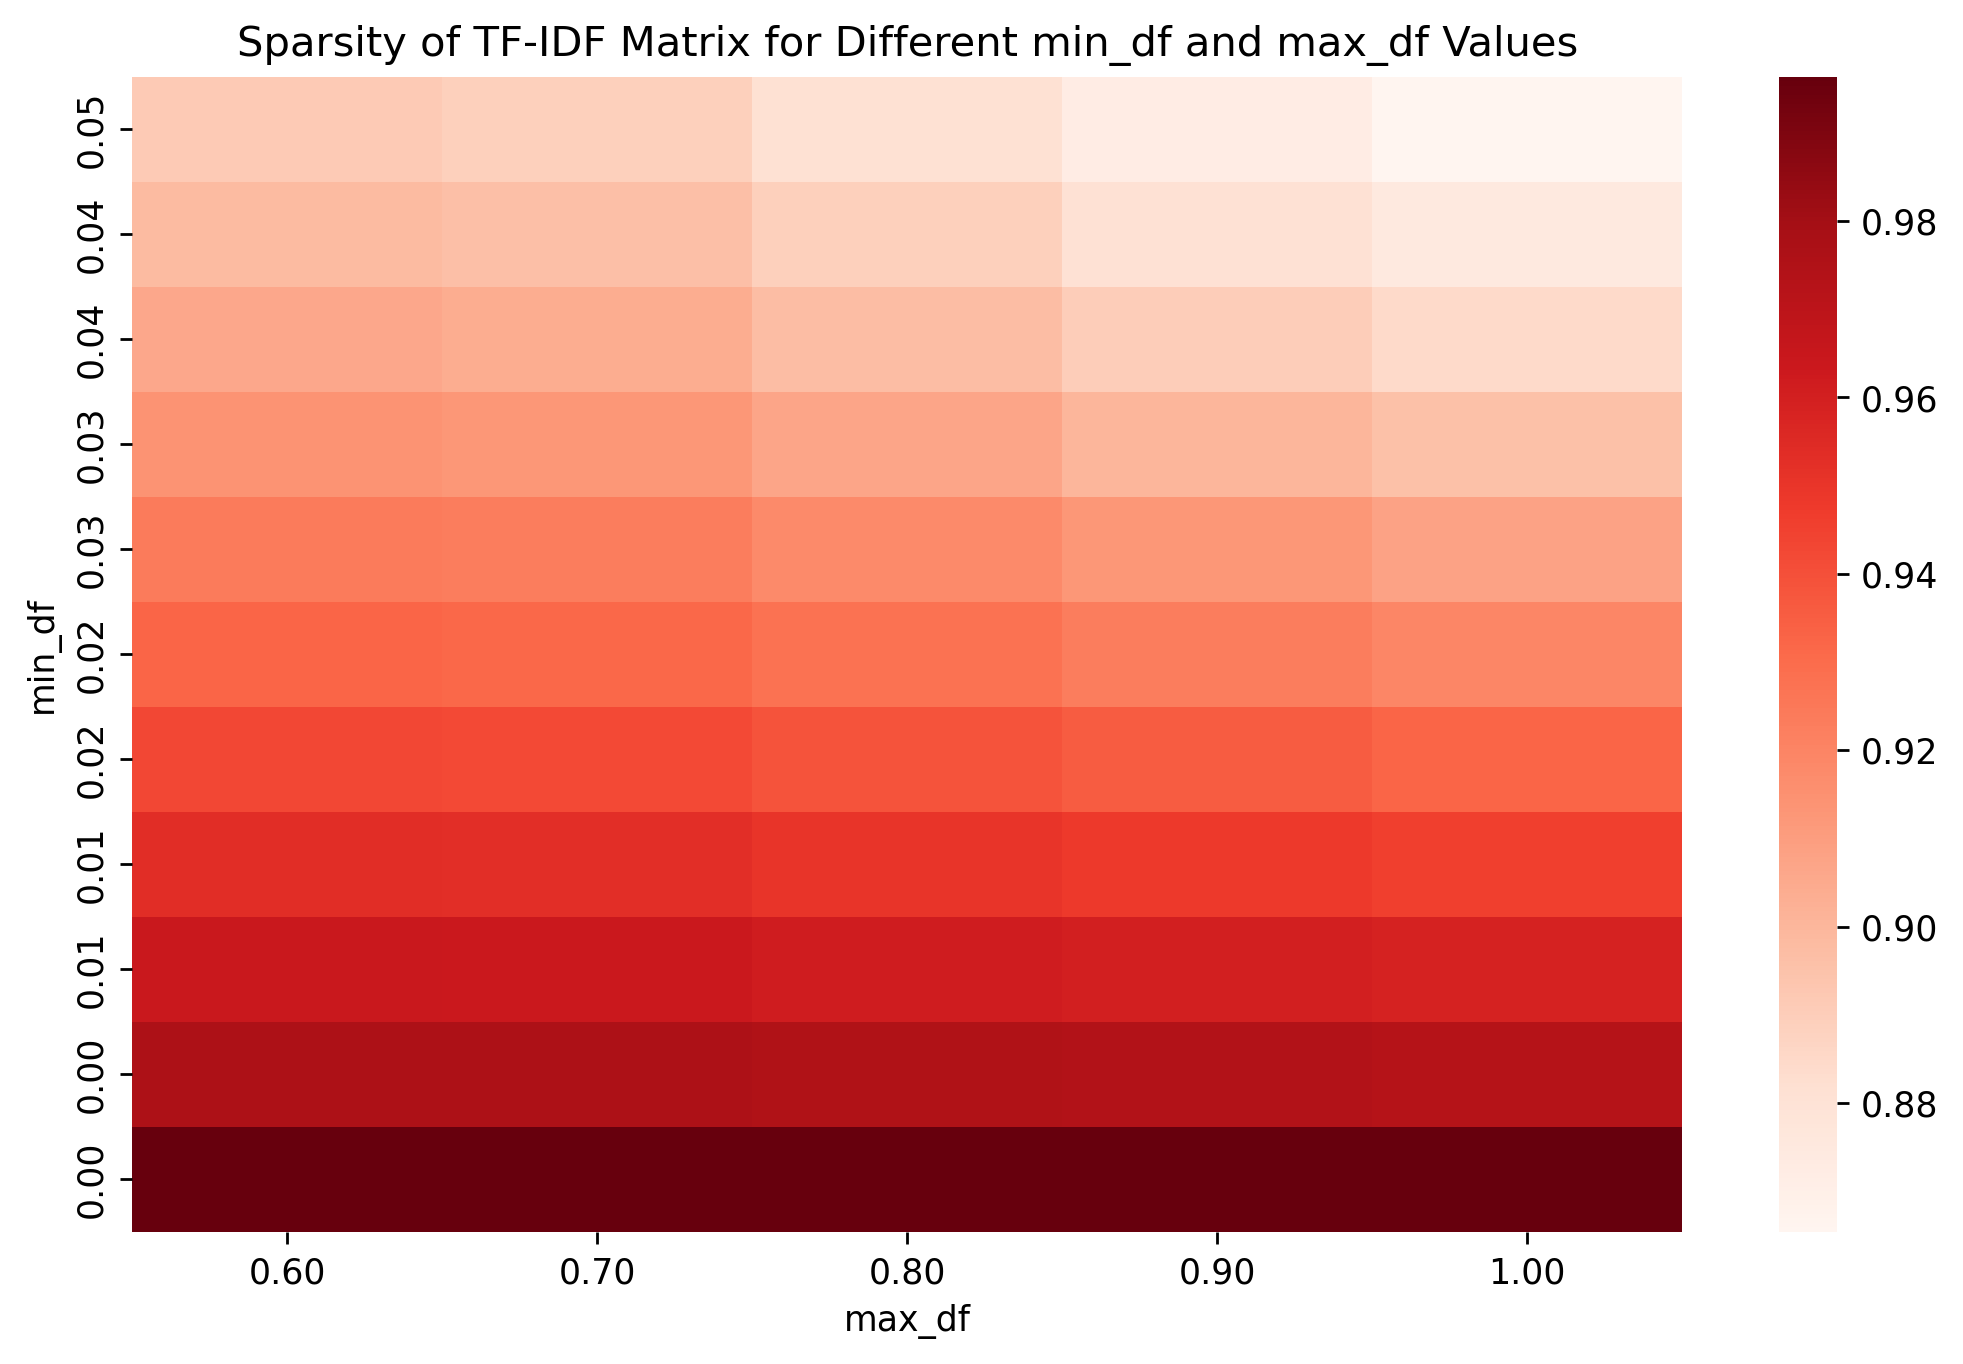

In [18]:
labtools.visualize_sparsity(abs_2001)

<center>
    <h6>
        <b>Figure 1. 
        </b> Sparsity of TF-IDF Matrix for Different <code>min_df</code> and<code>max_df</code> values
    </h6>
</center>

- **Lower right corner (high `min_df`, low `max_df`)**: This region has the lowest sparsity, indicating that most terms are included in the vocabulary due to the lenient filtering.
- **Upper left corner (low `min_df`, high `max_df`)**: This region has the highest sparsity, indicating that many terms have been excluded from the vocabulary due to the aggressive filtering of rare and common terms.
- **Diagonal trend**: As you move from the upper left corner to the lower right corner, the sparsity generally increases. This is because increasing `min_df` and decreasing `max_df` results in more aggressive filtering of the vocabulary.

The heatmap highlights the trade-off between sparsity and vocabulary size. A sparser matrix (higher sparsity) may be more computationally efficient, but it may also exclude important terms. A denser matrix (lower sparsity) includes more terms but may also include noise.

We chose the middle of the heatmap as the optimal region for the values of `min_df` and `max_df`, indicating a balance between including informative terms and excluding noise.

Let's also remove English and context-specific stopwords. Our resulting matrix looks like this:

In [19]:
df_tfidf_01 = labtools.vectorize_abstract(abs_2001, min_df=0.03, max_df=0.80)
df_tfidf_01.head(3)

algorithms  approximation  article  asymptotic  asymptotically  \
0         0.0            0.0      0.0         0.0             0.0   
1         0.0            0.0      0.0         0.0             0.0   
2         0.0            0.0      0.0         0.0             0.0   

   asymptotics  behavior  bound  boundary  bounded  ...  trees  underlying  \
0          0.0       0.0    0.0       0.0      0.0  ...    0.0    0.000000   
1          0.0       0.0    0.0       0.0      0.0  ...    0.0    0.149425   
2          0.0       0.0    0.0       0.0      0.0  ...    0.0    0.000000   

   uniform  upper  valued    values  variance  walk  walks  weak  
0      0.0    0.0     0.0  0.000000  0.000000   0.0    0.0   0.0  
1      0.0    0.0     0.0  0.000000  0.146881   0.0    0.0   0.0  
2      0.0    0.0     0.0  0.180575  0.000000   0.0    0.0   0.0  

[3 rows x 179 columns]

<center>
    <h6>
        <b>Table 1. 
        </b>TF-IDF Matrix
    </h6>
</center>

<div style="background-color:#711012; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">DIMENSIONALITY REDUCTION</h2></center>
</div>

Next, we reduce the complexity of the dataset by decreasing the number of its dimensions. We first determine the number of singular vectors that would give us at least 90% of the variance explained using the `TruncatedSVD` method.

Number of components for at least 90% variance explained: 142


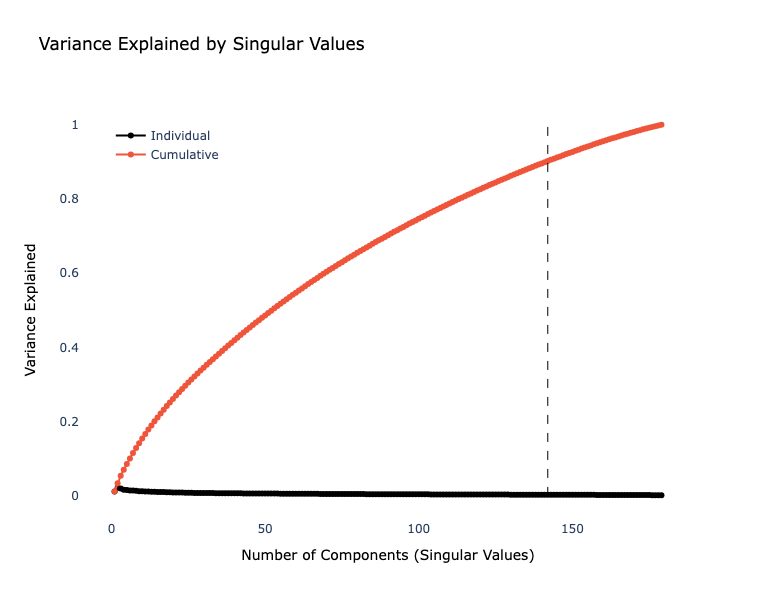

142

In [20]:
labtools.get_n_components(df_tfidf_01, show_viz=True)

<center>
    <h6>
        <b>Figure 2. 
        </b> Individual and Cumulative Variance Explained of the SV Components
    </h6>
</center>


We then proceed to reducing the number of dimensions of our dataset based on the initial check.

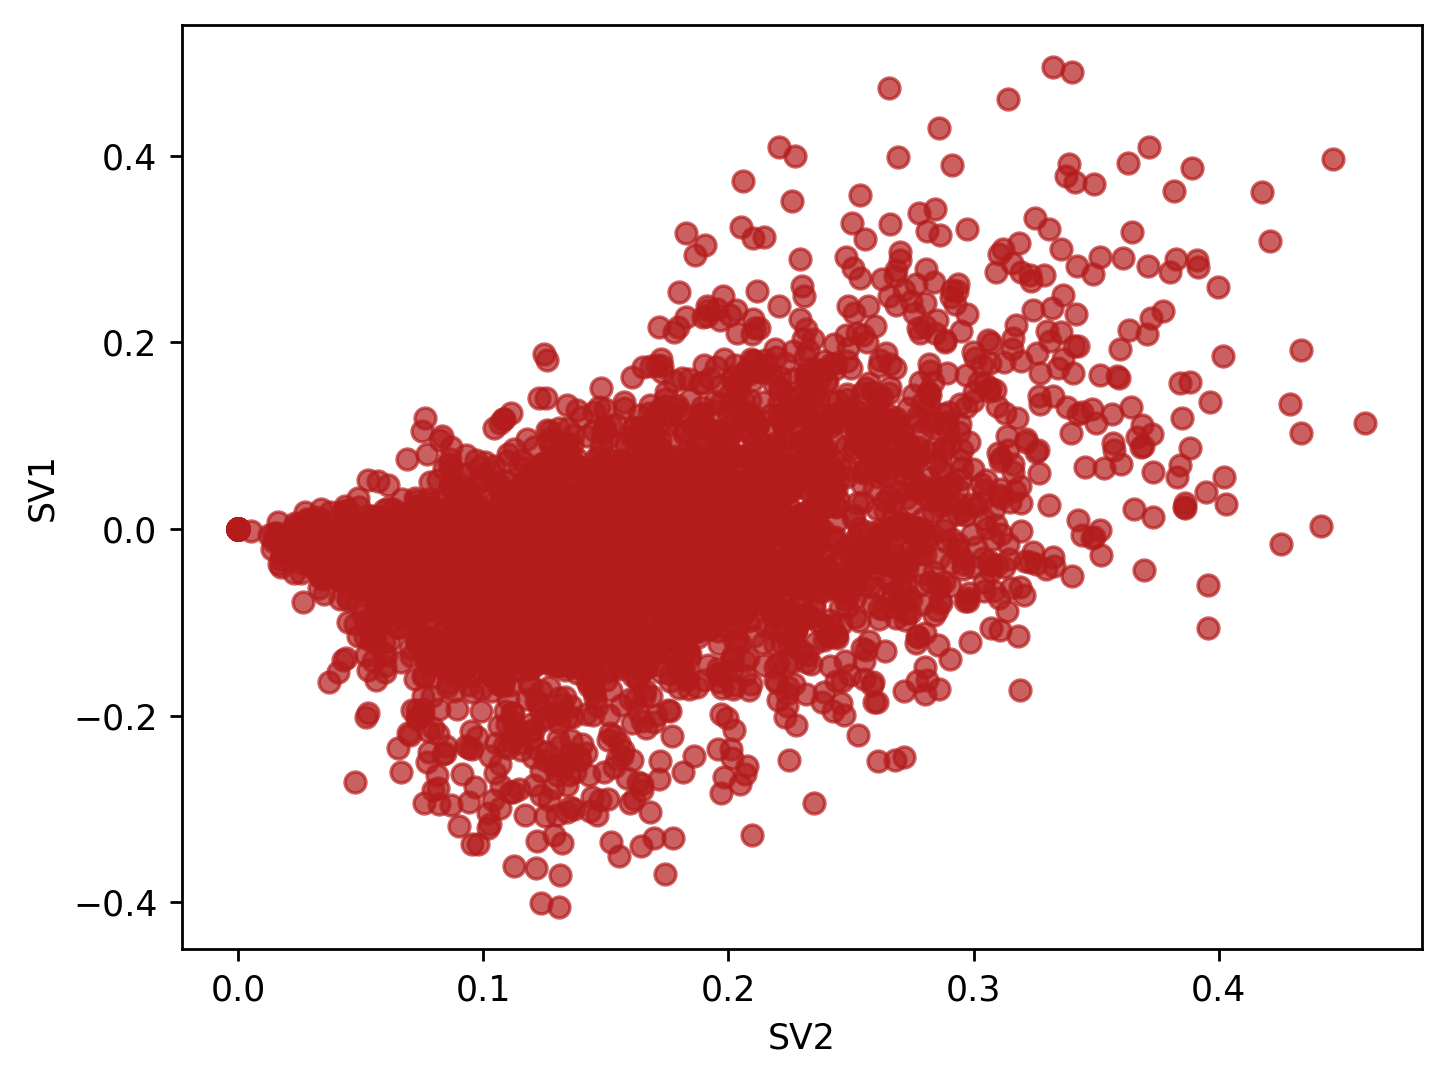

In [21]:
reduced_01 = (labtools.reduce_dimensions(labtools
                                         .get_n_components(df_tfidf_01,
                                                           show_viz=False),
                                         df_tfidf_01))
plt.figure(dpi=250)
plt.scatter(reduced_01[:, 0], reduced_01[:, 1], alpha=0.7, color='#b41c1c')
plt.xlabel('SV2')
plt.ylabel('SV1');

<center>
    <h6>
        <b>Figure 3. 
        </b> The TF-IDF as projected to the first two singular vectors
    </h6>
</center>


<div style="background-color:#711012; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">CLUSTERING</h2></center>
</div>

Optimal number of clusters: 2
Threshold distance: 6.704516


6.704516212781037

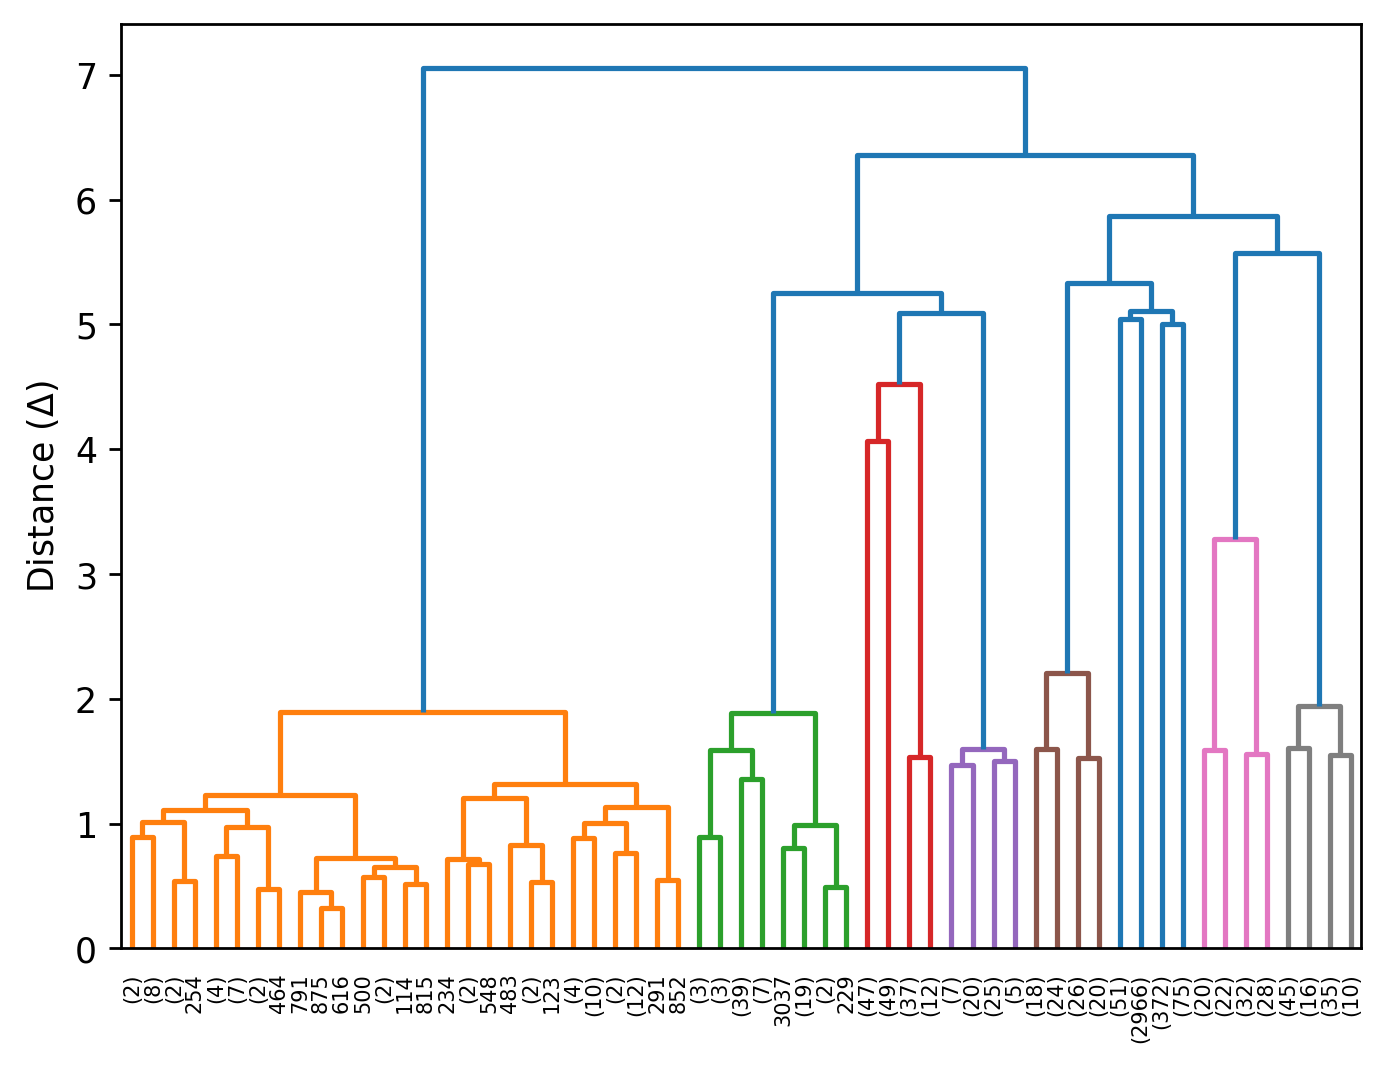

In [11]:
labtools.hierarchical_clustering(reduced_01)

<center>
    <h6>
        <b>Figure 4. 
        </b> Ward's Clustering Dendrogram Results
    </h6>
</center>


From the dendrogram, we see that the optimal number of clusters is two. However, it would be interesting to investigate the sub-clusters that were formed under each main cluster because we can see that one main cluster has more points, so it is possible that we can further find subgroups under it. Let's check these both.

<div style="background-color: #cbc6c6; padding: 10px 0;">
    <center><h4 style="color: #242424;font-weight:bold">EDA on Initial Clusters</h4></center>
</div>

Let's first check the two main clusters. This is what it looks when projected on the first two singular vectors:

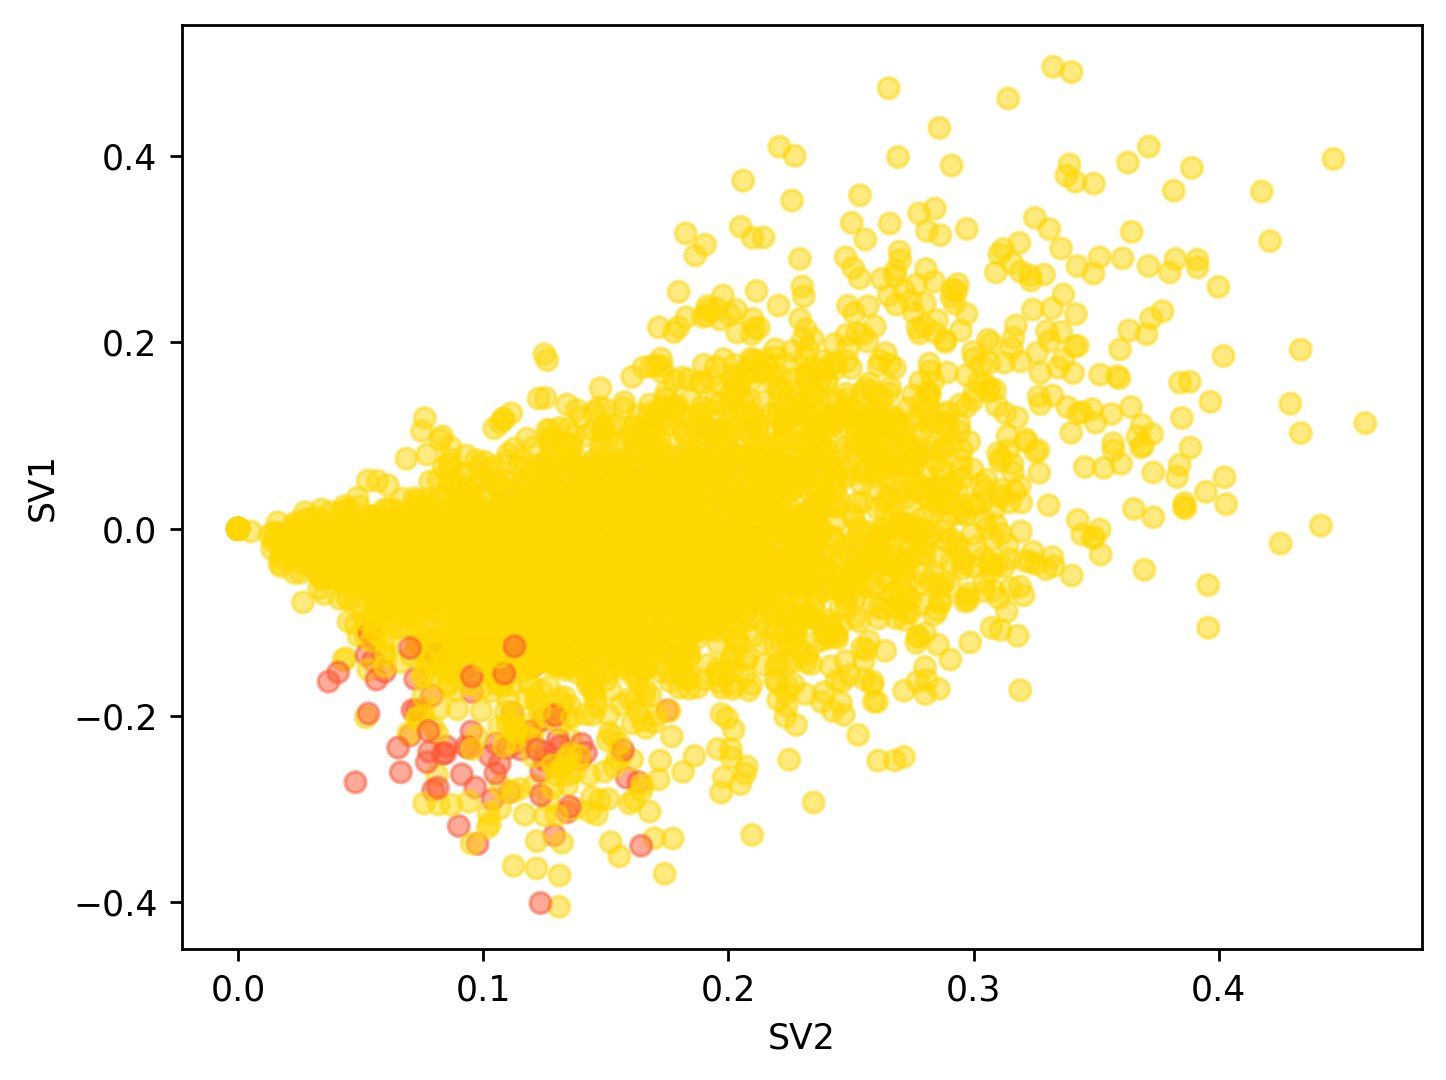

In [22]:
labtools.cluster_predict(reduced_01, df_2001, show_viz=True)

<center>
    <h6>
        <b>Figure 5. 
        </b> Clustering Results as Projected on the First Two Singular Vectors
    </h6>
</center>

Let's visualize the abstracts of the publications belonging to each main cluster using a word cloud to have an idea on what the cluster is all about.

In [23]:
clustered_df = labtools.cluster_predict(reduced_01, df_2001, show_viz=False,
                               get_updated_df=True)

#### **Cluster 1: 2001-2005**

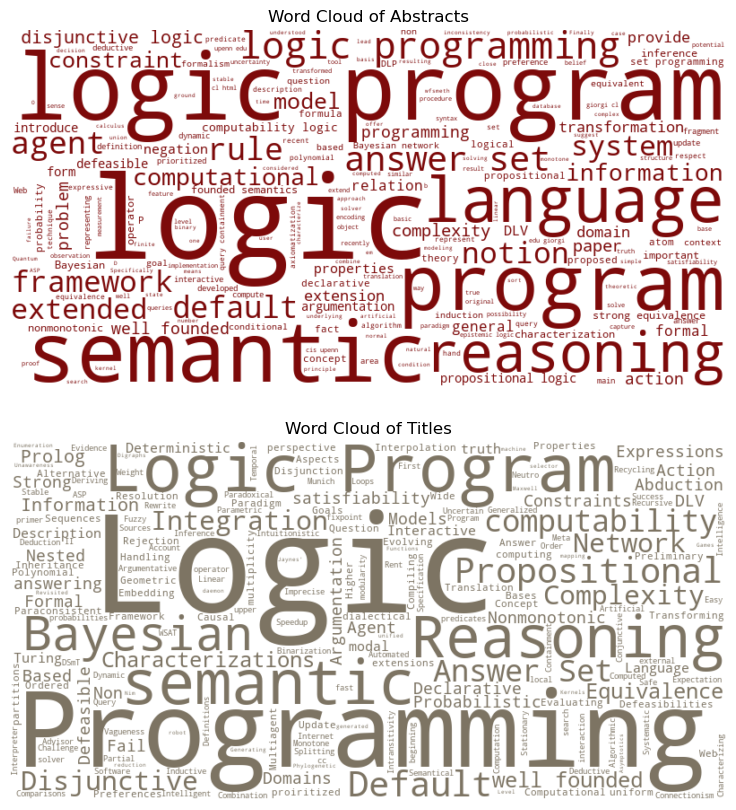

In [24]:
labtools.generate_wordclouds(clustered_df, cluster_number=1)

<center>
    <h6>
        <b>Figure 6. 
        </b> Word Cloud of Main Cluster 1
    </h6>
</center>

#### **Cluster 2: 2001-2005**

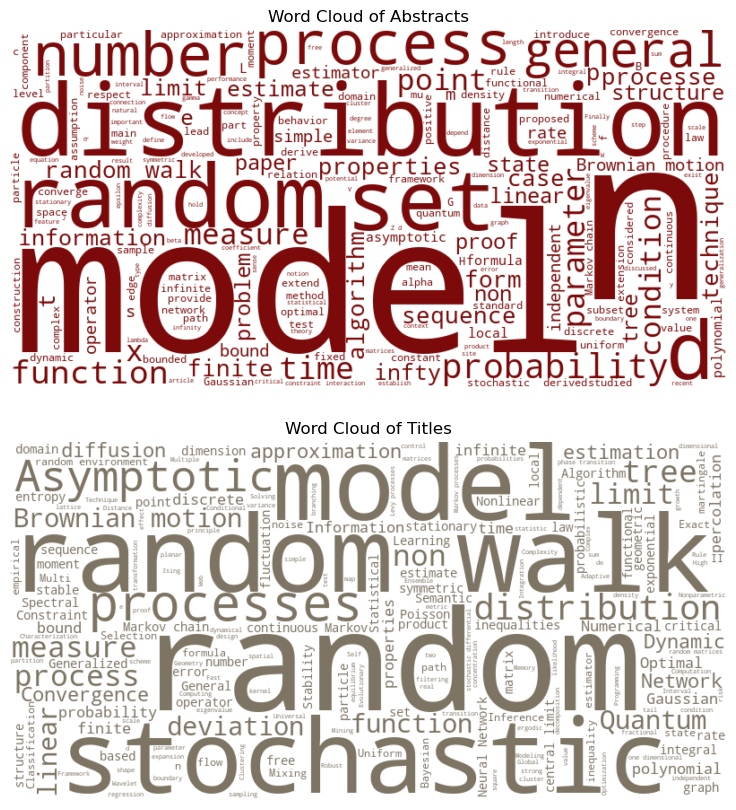

In [25]:
labtools.generate_wordclouds(clustered_df, cluster_number=2)

<center>
    <h6>
        <b>Figure 7. 
        </b> Word Cloud of Main Cluster 2
    </h6>
</center>

**How imbalanced are our main clusters between 2001 and 2005?**

As we can see, Cluster 2 has significantly more points than Cluster 1. Because of this, it could be worth investigating its sub-clusters. 

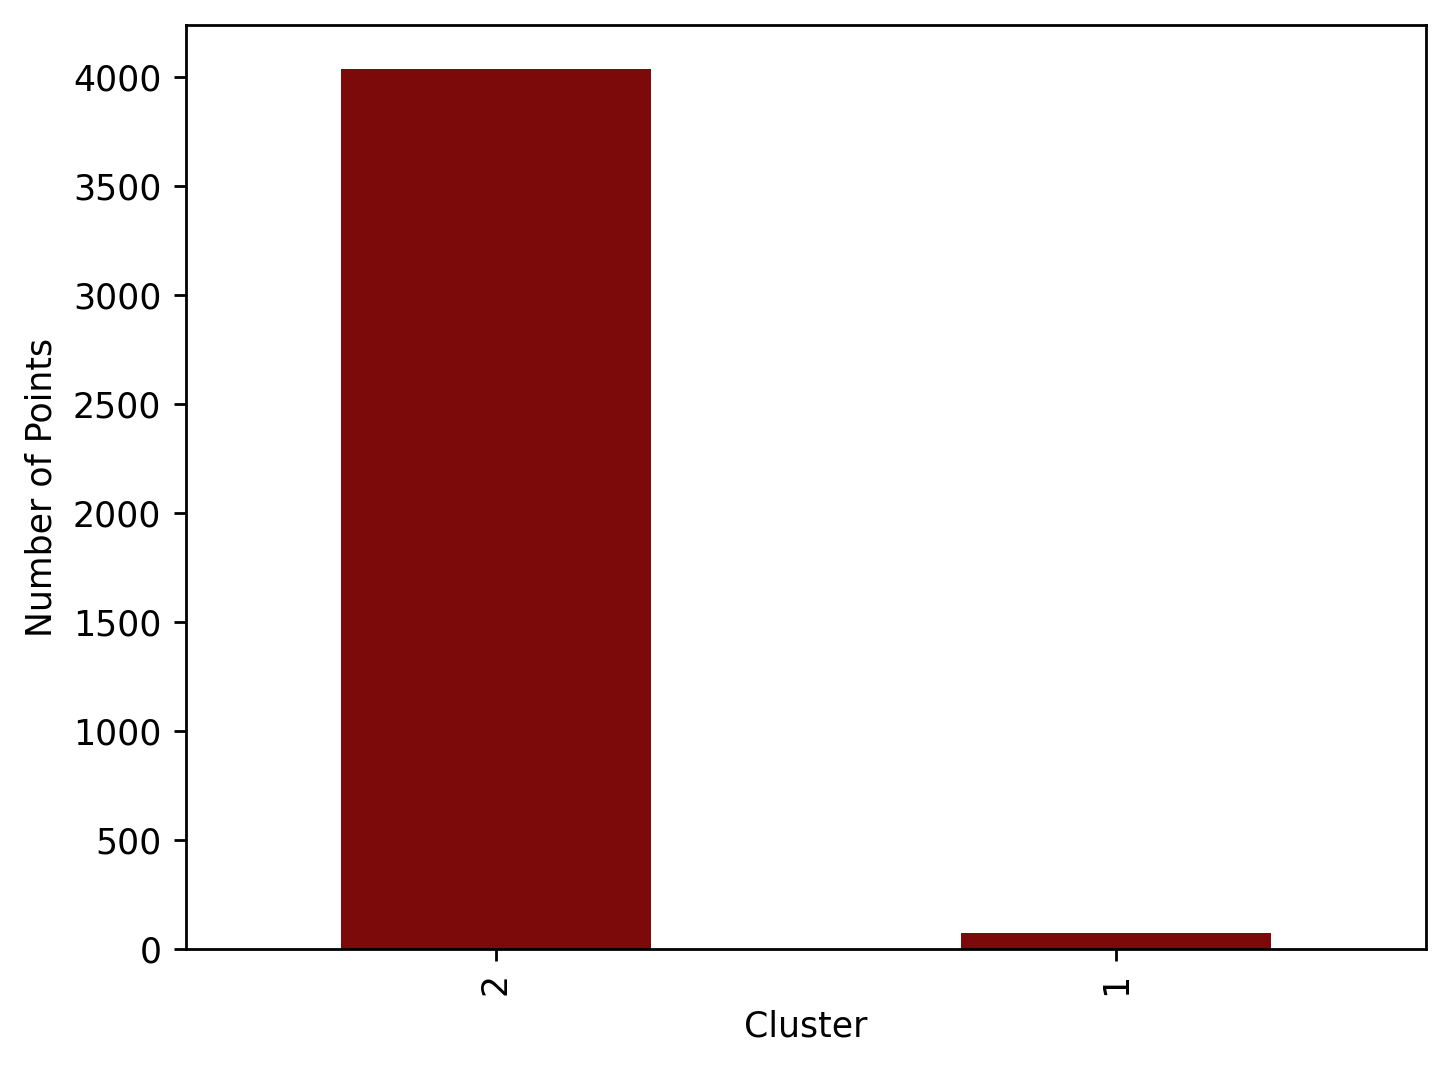

In [26]:
plt.figure(dpi=250)
clustered_df.cluster.value_counts().plot(kind='bar', color='#7d0a0a',
                                         xlabel='Cluster',
                                         ylabel='Number of Points');

<center>
    <h6>
        <b>Figure 8. 
        </b> Visualizing the Distribution of Points to the Initial Clusters
    </h6>
</center>

To do this, we refer back to our dendrogram and change our threshold so that we would capture the subclusters of the large main cluster. Through eyeballing it, a threshold of 5.8 would suffice. The resulting distribution looks like this:

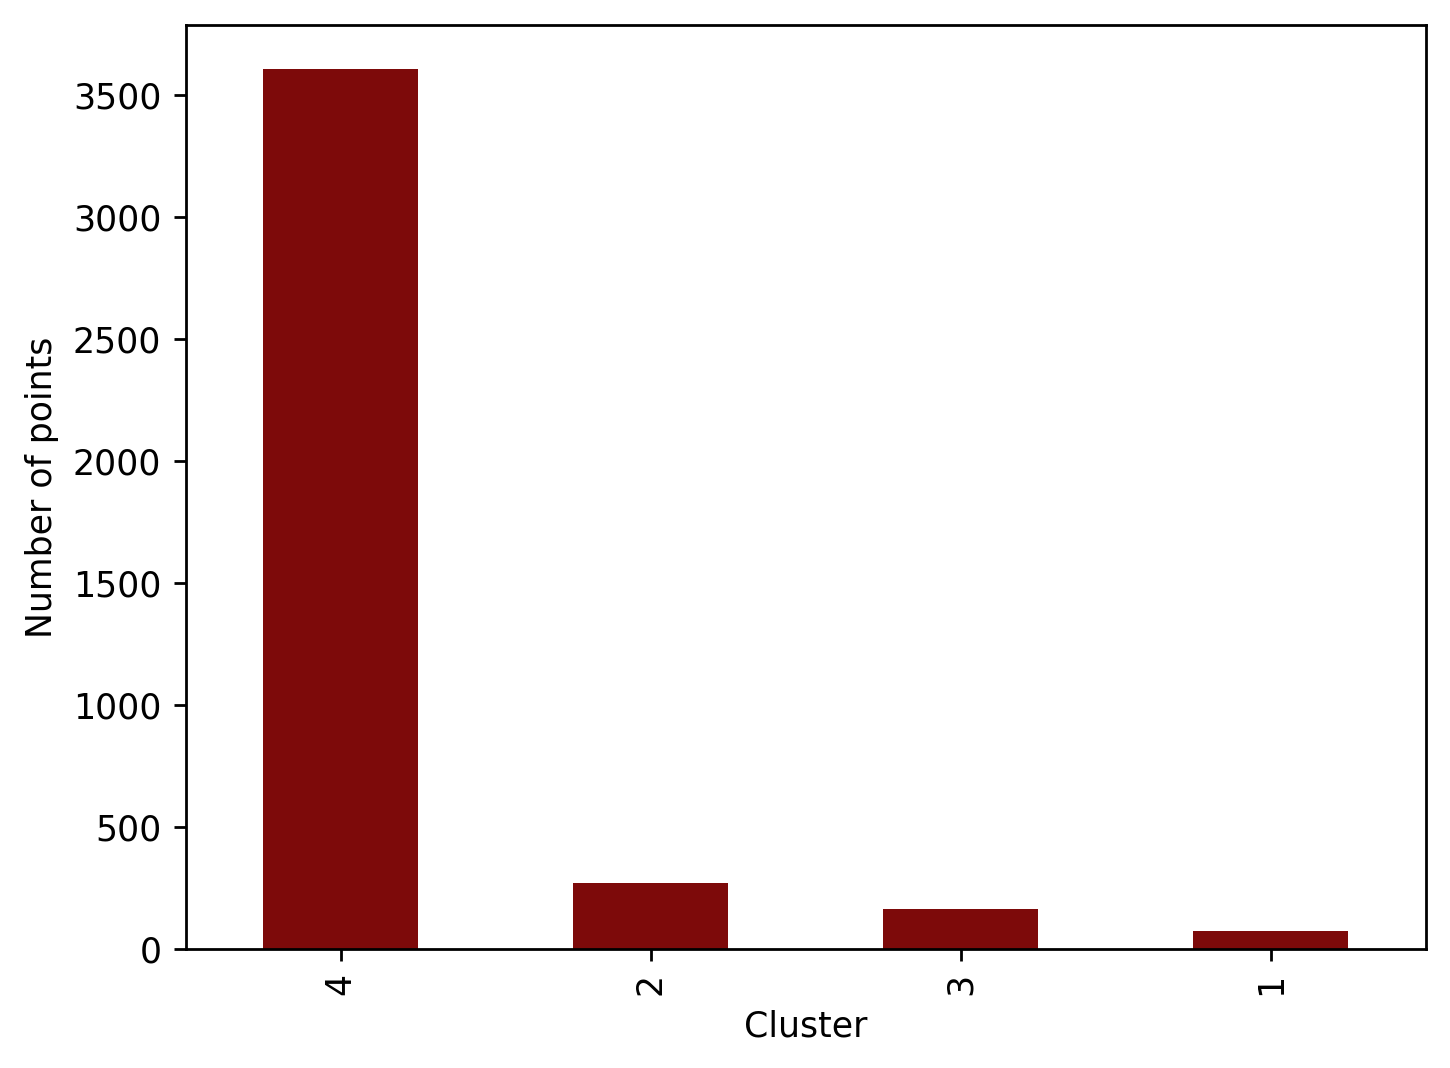

In [28]:
clustered_df = labtools.cluster_predict(reduced_01, df_2001, show_viz=False, 
                               get_updated_df=True, thres=5.8)

plt.figure(dpi=250)
clustered_df.cluster.value_counts().plot(kind='bar', color='#7d0a0a', 
                                         xlabel='Cluster',
                                         ylabel='Number of points');

<center>
    <h6>
        <b>Figure 9. 
        </b> Visualizing the Distribution of Points after Re-clustering
    </h6>
</center>

Although one cluster still dominates the others with respect to the number of points, the general distribution of the points improved. Let's see what words compose each of these clusters.

#### **Final Cluster 1 (2001-2005)**

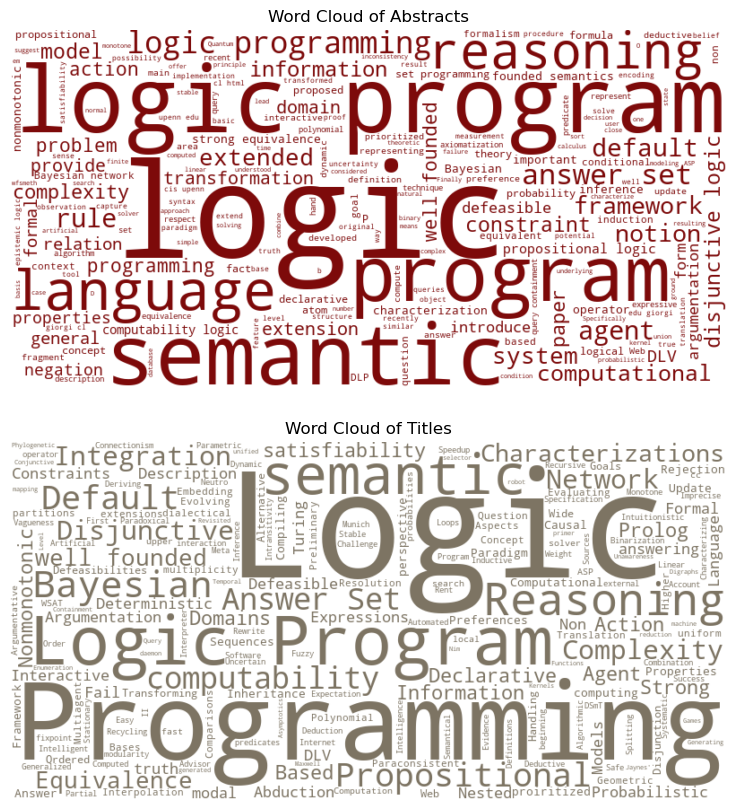

In [29]:
# Cluster 1: 2001-2005
labtools.generate_wordclouds(clustered_df, cluster_number=1)

<center>
    <h6>
        <b>Figure 10. 
        </b> Word Cloud of Final Cluster 1 (2001-2005)
    </h6>
</center>

#### **Final Cluster 2 (2001-2005)**

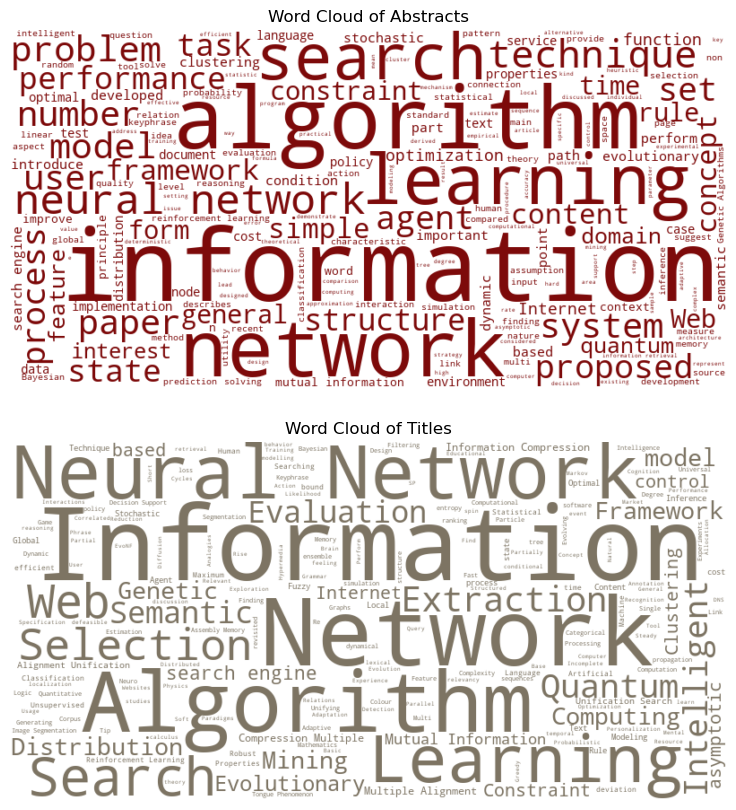

In [30]:
# Cluster 2: 2001-2005
labtools.generate_wordclouds(clustered_df, cluster_number=2)

<center>
    <h6>
        <b>Figure 11. 
        </b> Word Cloud of Final Cluster 2 (2001-2005)
    </h6>
</center>

#### **Final Cluster 3 (2001-2005)**

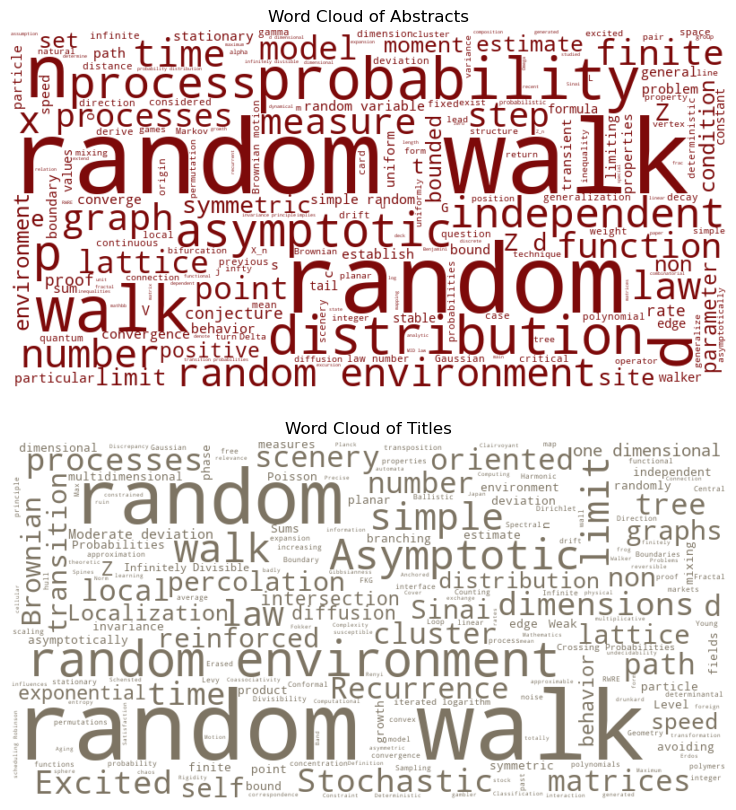

In [31]:
# Cluster 3: 2001-2005
labtools.generate_wordclouds(clustered_df, cluster_number=3)

<center>
    <h6>
        <b>Figure 12. 
        </b> Word Cloud of Final Cluster 3 (2001-2005)
    </h6>
</center>

#### **Final Cluster 4 (2001-2005)**

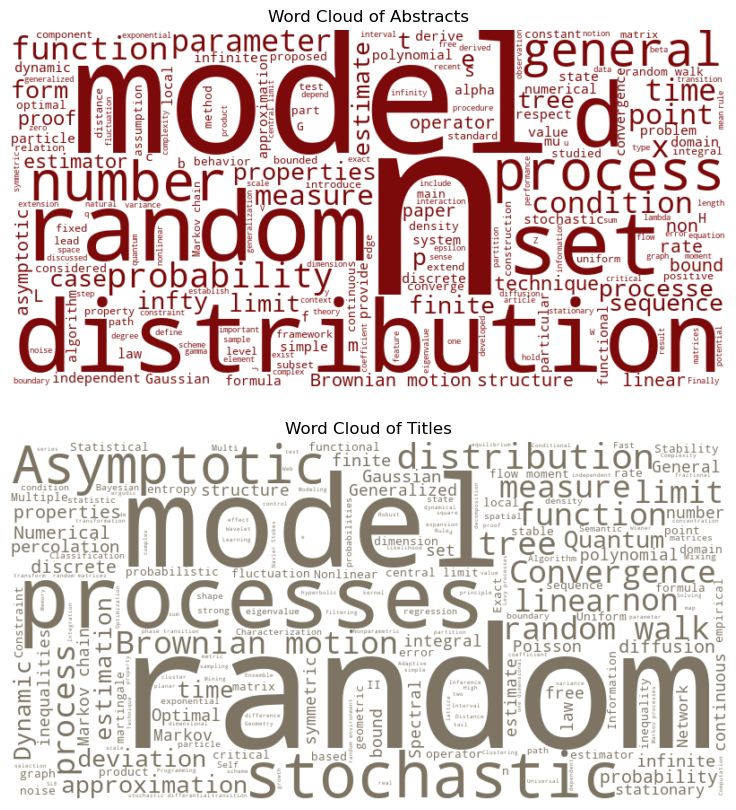

In [32]:
# Cluster 4: 2001-2005
labtools.generate_wordclouds(clustered_df, cluster_number=4)

<center>
    <h6>
        <b>Figure 13. 
        </b> Word Cloud of Final Cluster 4 (2001-2005)
    </h6>
</center>

<div style="background-color:#711012; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">CLUSTER INTERPRETATION</h2></center>
</div>

#### **Cluster 1: Computational Logic and Bayesian Reasoning**
- **Abstract Keywords**: logic, program, semantic, language, computational
- **Title Keywords**: logic, programming, reasoning, Bayesian, Integration
- **Insights**: 
  - The decrease in frequencies of traditional terms like "semantic" and "rule" may suggest a shift from theoretical cores to applied systems.
  - Emerging terms such as "Bayesian", "integration", and "probabilistic" may indicate expansion into integrated, real-world AI systems.
  - Increased prominence of words like "computational", "information", and "framework" may point to the application of logical systems to computational problems.

#### **Cluster 2: Neural Information Networks and Intelligent Algorithms**
- **Abstract Keywords**: information, neural, network, algorithm, search, learning
- **Title Keywords**: information, neural network, algorithm, learning, search, web selection, evaluation
- **Insights**:
  - Indicates research on neural networks and intelligent algorithms for information processing and learning tasks.
  - Focuses on the development and application of algorithms for tasks like information retrieval and web search.

#### **Cluster 3: Stochastic Processes: Bridging Theory and Applications**
- **Abstract Keywords**: distribution, model, random, set, probability
- **Title Keywords**: random, walk, stochastic, model, asymptotic, lattice, independent
- **Insights**:
    - Words like “stochastic”, “random walk”, and “Brownian motion” continue to indicate modeling of stochastic processes. However, the increased prominence of terms like “lattice” and “independent” suggest a rising emphasis on applying stochastic process theory to model real-world systems and phenomena more accurately. This expansion points to a growing focus on applications.
    - On the other hand, we also see increased prominence in mathematical analysis terms like “asymptotic”. This shows strengthening of theoretical analysis capabilities around stochastic processes.
    - Together, the vocabulary shifts indicate an evolution bridging theoretical stochastic process models with field applications while also building up the analytical tools. There appear to be twin expansions in applications and analysis anchored upon stochastic process theory.

#### **Cluster 4: The Theory of Stochastic Processes**
- **Insights**:
  - Cluster 4 is a bit difficult to label as it shares the same context as Cluster 3. While we think this is true, we surmise that this cluster is more focused on the theoretical aspect of stochastic processes, unlike its counterpart that has emerging focus on applications.